# Kategorische Vorhersage von Autopreisen basierend auf Fahrzeugdaten

In [2]:
# Alle benötigten Bibliotheken importieren
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
import seaborn as sn

In diesem Projekt wird ein realer Automobil-Datensatz analysiert, um die Fahrzeuge einer Preiskategorie zuzuordnen. Dabei handelt es sich um ein Klassifikationsproblem, bei dem aus technischen Merkmalen und Ausstattungsmerkmalen des Fahrzeugs die Zielklasse vorhergesagt werden soll.

Arbeitsschritte:

Datenbereinigung, u. a. Entfernung stark fehlender Features

Feature Engineering inkl. Handling von Kategorischen Variablen mittels OneHotEncoding

Vergleich der Vorhersageleistung mit einem Benchmark-Modell, das immer die häufigste Klasse vorhersagt (~80 %)

Einsatz von logistischer Regression zur Klassifikation mit Train/Test-Splitting

Das finale Modell erreicht eine Test-Genauigkeit von bis zu ~90 % und zeigt stabile Ergebnisse über verschiedene Durchläufe. Zudem wird auf typische Probleme wie Train-Test-Leakage bei OneHotEncoding eingegangen.

In [4]:
# Daten laden
df = pd.read_csv('../data/car details v4.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


### Aufgreifen von allgemeiner Information:

In [6]:
# Datentypen der Features abfragen
df.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

### Folgende Transformationen finden statt:
1. **Umrechnung von Werten**
2. **Aufsplitten von Features**
3. **Konvertierung von Datentypen**
4. **Bereinigung von unsinnigen Ausreißern**

#### 1. Umrechnungen

In [9]:
# Umrechnen von indischer Rupie in Euro
df['Price'] = df['Price'].apply(lambda x: x*0.011)

# Konvertieren von float zu int
df['Price'] = df['Price'].astype('int')

# Baujahr in Alter des Autos ändern
df['Year'] = df['Year'].apply(lambda x: 2024-x)

# Beide Features umbennenen
df = df.rename(columns={"Price": "Price in €", "Year": "Age"})

#### 2. Aufsplitten von 'Max Power' und 'Max Torque'

In [11]:
# Max Power und Max Torque wird in jeweils zwei separate Features aufgeteilt, Trennzeichen ist '@'
df[['BHP','BHP_RPM']] = df['Max Power'].str.split('@',expand=True)
df[['Nm','Nm_RPM']] = df['Max Torque'].str.split('@',expand=True)

# Max Power und Max Torque wird anschließend gelöscht
df = df.drop(['Max Power', 'Max Torque'], axis=1)

#### 3. Datenkonvertierung

In [13]:
# Einheit in 'Engine' Feature einfügen
df = df.rename(columns={"Engine": "Engine in cc"})

# Entfernen aller nicht numerischer Zeichen in ausgewählten Features
cols_to_replace = ['Engine in cc', 'BHP', 'BHP_RPM', 'Nm', 'Nm_RPM']
df[cols_to_replace] = df[cols_to_replace].replace(r'\D+', '', regex=True)

In [14]:
# Potentielle empty string Werte mit NaN ersetzen
df[cols_to_replace] = df[cols_to_replace].apply(lambda x: x.str.strip().replace('', np.nan))

# Float in Integer umwandeln, Int64 unterstützt Konvertierung ohne zuvor NaN Werte auffüllen zu müssen 
df[cols_to_replace] = df[cols_to_replace].astype('Int64')

In [15]:
# 'Seating Capacity' in kategorisch umwandeln, da Float keinen Sinn ergibt
df['Seating Capacity'] = df['Seating Capacity'].astype('object')

#### Überprüfen, ob Konvertierung geklappt hat:

In [17]:
# Abfrage ob alle Datentypen nach Wunsch konvertiert wurden
df.dtypes

Make                   object
Model                  object
Price in €              int32
Age                     int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine in cc            Int64
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity       object
Fuel Tank Capacity    float64
BHP                     Int64
BHP_RPM                 Int64
Nm                      Int64
Nm_RPM                  Int64
dtype: object

#### Nach Ausreißern bei numerischen Features suchen:

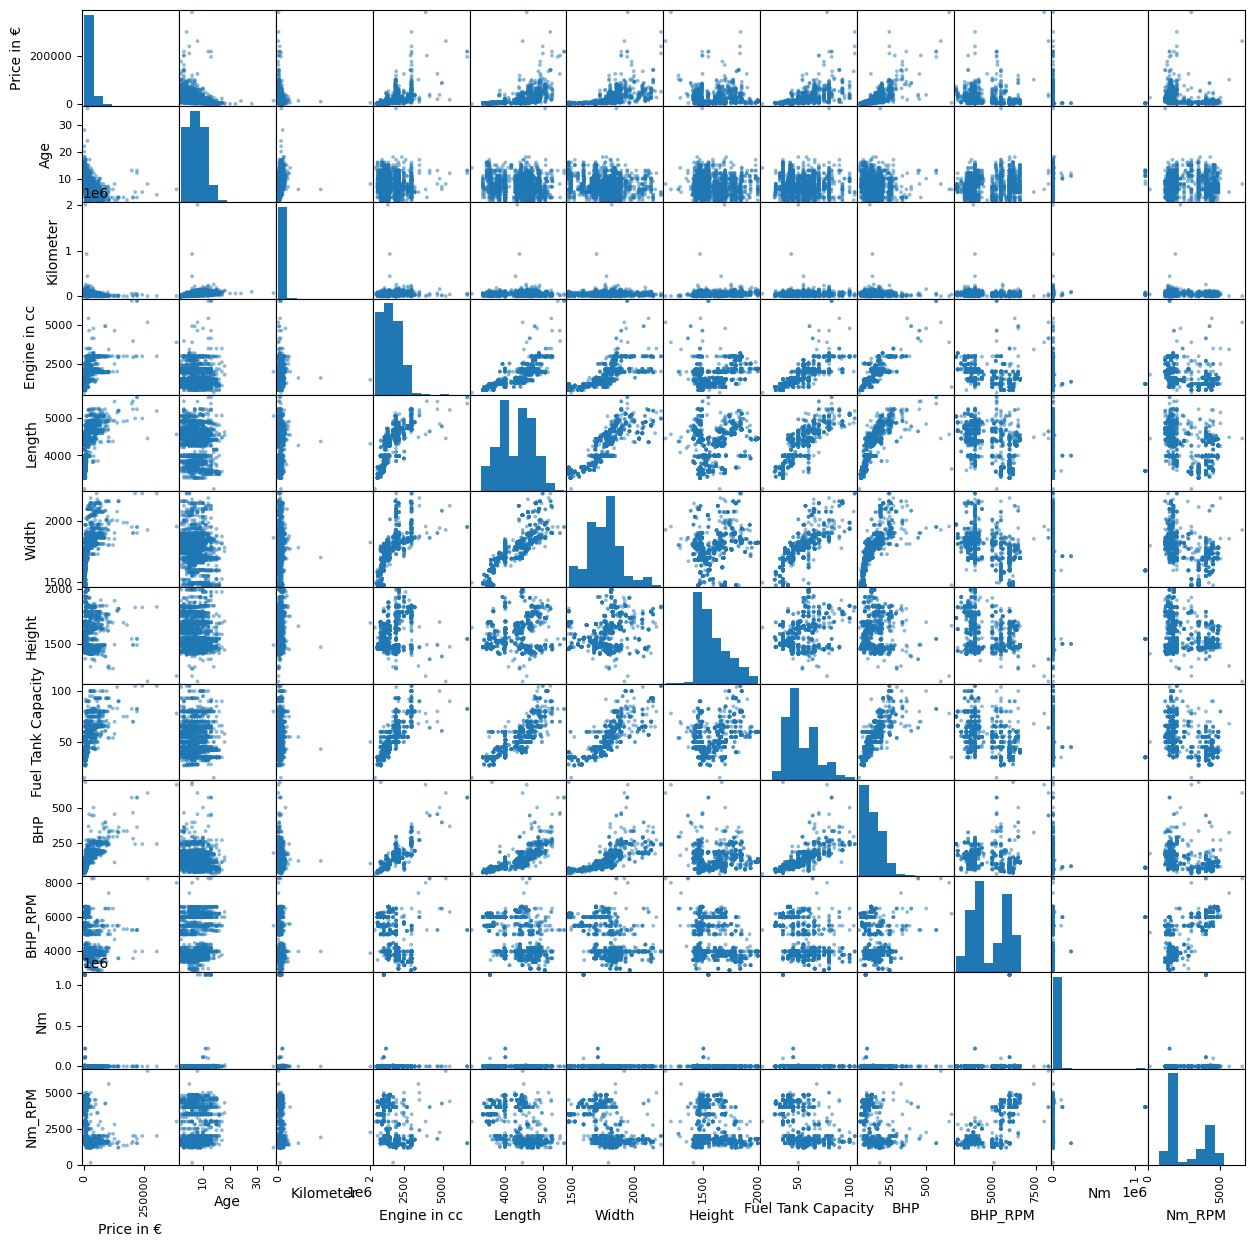

In [19]:
matrix = pd.plotting.scatter_matrix(df, figsize=(15,15), s=30, marker='.' )

In 'Nm' sind unrealistische Ausreißer erkennbar.   
(Liegen fernab von anderen Punkten, Rest der Punkte ist sehr zusammengestaucht).
<br><br>
#### Weitere Visualisierungen:

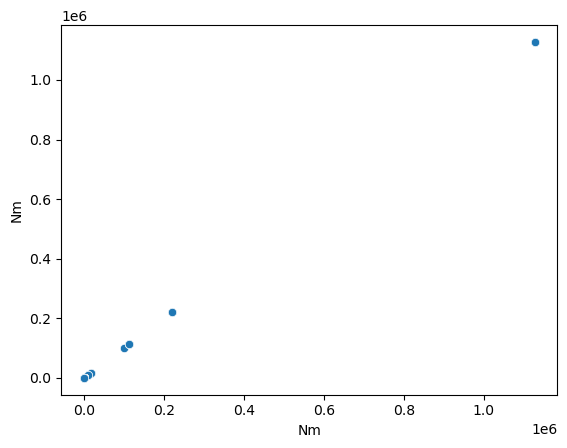

In [21]:
sn.scatterplot(data=df, x ='Nm', y='Nm')
plt.show()

Das Serienauto mit dem höchsten Drehmoment hat 2.360 Nm, alle Werte über diesem Schwellenwert werden entfernt: 

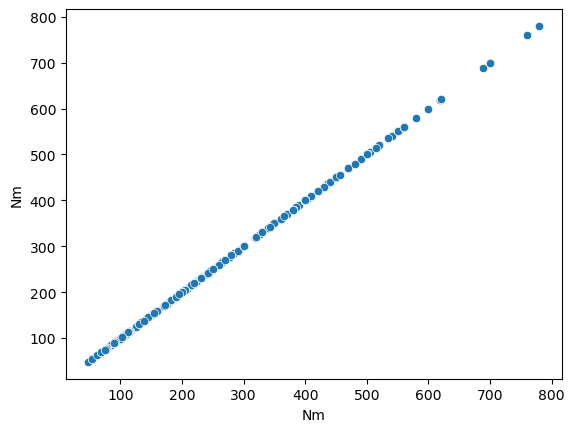

In [23]:
df = df.drop(df[df['Nm'] > 2360].index)
sn.scatterplot(data=df, x ='Nm', y='Nm')
plt.show()

## Bereinigtes Dataframe:

In [25]:
# Stellt sicher, dass alle Spalten gezeigt werden
pd.set_option('display.max_columns', None)
df

,Make,Model,Price in €,Age,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine in cc,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,BHP,BHP_RPM,Nm,Nm_RPM
0,Honda,Amaze 1.2 VX i-VTEC,5555,7,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198,FWD,3990.0,1680.0,1505.0,5.0,35.0,87,6000,109,4500
1,Maruti Suzuki,Swift DZire VDI,4950,10,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248,FWD,3995.0,1695.0,1555.0,5.0,42.0,74,4000,190,2000
3,Toyota,Glanza G,8789,5,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197,FWD,3995.0,1745.0,1510.0,5.0,37.0,82,6000,113,4200
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],21450,6,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393,RWD,4735.0,1830.0,1795.0,7.0,55.0,148,3400,343,1400
5,Maruti Suzuki,Ciaz ZXi,7425,7,73315,Petrol,Manual,Pune,Grey,First,Individual,1373,FWD,4490.0,1730.0,1485.0,5.0,43.0,91,6000,130,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],9350,8,90300,Diesel,Manual,Surat,White,First,Individual,2179,FWD,4585.0,1890.0,1785.0,7.0,70.0,138,3750,330,1600
2055,Hyundai,Eon D-Lite +,3025,10,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814,FWD,3495.0,1550.0,1500.0,5.0,32.0,55,5500,75,4000
2056,Ford,Figo Duratec Petrol ZXI 1.2,2640,11,73000,Petrol,Manual,Thane,Silver,First,Individual,1196,FWD,3795.0,1680.0,1427.0,5.0,45.0,70,6250,102,4000
2057,BMW,5-Series 520d Luxury Line [2017-2019],47190,6,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995,RWD,4936.0,1868.0,1479.0,5.0,65.0,188,4000,400,1750


In [26]:
# Target und Features werden getrennt
target = df['Price in €']
features = df.loc[:, df.columns != 'Price in €']

In [27]:
target

0        5555
1        4950
3        8789
4       21450
5        7425
        ...  
2054     9350
2055     3025
2056     2640
2057    47190
2058     7370
Name: Price in €, Length: 2030, dtype: int32

In [28]:
features

,Make,Model,Age,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine in cc,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,BHP,BHP_RPM,Nm,Nm_RPM
0,Honda,Amaze 1.2 VX i-VTEC,7,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198,FWD,3990.0,1680.0,1505.0,5.0,35.0,87,6000,109,4500
1,Maruti Suzuki,Swift DZire VDI,10,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248,FWD,3995.0,1695.0,1555.0,5.0,42.0,74,4000,190,2000
3,Toyota,Glanza G,5,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197,FWD,3995.0,1745.0,1510.0,5.0,37.0,82,6000,113,4200
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],6,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393,RWD,4735.0,1830.0,1795.0,7.0,55.0,148,3400,343,1400
5,Maruti Suzuki,Ciaz ZXi,7,73315,Petrol,Manual,Pune,Grey,First,Individual,1373,FWD,4490.0,1730.0,1485.0,5.0,43.0,91,6000,130,4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],8,90300,Diesel,Manual,Surat,White,First,Individual,2179,FWD,4585.0,1890.0,1785.0,7.0,70.0,138,3750,330,1600
2055,Hyundai,Eon D-Lite +,10,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814,FWD,3495.0,1550.0,1500.0,5.0,32.0,55,5500,75,4000
2056,Ford,Figo Duratec Petrol ZXI 1.2,11,73000,Petrol,Manual,Thane,Silver,First,Individual,1196,FWD,3795.0,1680.0,1427.0,5.0,45.0,70,6250,102,4000
2057,BMW,5-Series 520d Luxury Line [2017-2019],6,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995,RWD,4936.0,1868.0,1479.0,5.0,65.0,188,4000,400,1750


In [29]:
# Überprüft, ob Werte im Target fehlen
target.isna().sum()

0

#### Target und folglich auch Features können unverändert bleiben, da keine Werte fehlen.

#### Für eine lineare Regression sind numerische Features erforderlich, da sie auf Berechnungen basiert. Kategorische Features bieten schlichtweg keine logische Möglichkeit, um mit ihnen rechnen zu können.

In [32]:
# Anzahl individueller Werte aller kategorischen Features
cat_count = features.select_dtypes(include='object').nunique()
cat_count.columns = ['Feature','Count']
cat_count

Make                  33
Model               1039
Fuel Type              9
Transmission           2
Location              77
Color                 17
Owner                  6
Seller Type            3
Drivetrain             3
Seating Capacity       6
dtype: int64

#### Entfernen der Features, wenn die Anzahl der Werte bei über 50 liegt:

In [34]:
features = features.drop(labels=['Model', 'Location'], axis=1)

#### Zählen fehlender Werte je Feature:

In [36]:
features.isna().sum()

Make                    0
Age                     0
Kilometer               0
Fuel Type               0
Transmission            0
Color                   0
Owner                   0
Seller Type             0
Engine in cc           80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
BHP                    80
BHP_RPM                84
Nm                     80
Nm_RPM                 80
dtype: int64

Für kategorische Features bietet es sich an die Zellen mit 'unknown' oder 'none' zu füllen oder auch mit dem häufigsten Wert. Auch möglich ist es die fehlenden Werte <br>
proportional zur Häufigkeit der Kategorien zu füllen. Dies setzt die Annahme voraus, dass das Auftreten der fehlenden Werte zufällig ist und keine Relevanz zur Beschreibung der Daten hat.
Für numerische Werte empfiehlt es sich oft mit dem Mittelwert oder Median aufzufüllen, um die Daten so gering wie möglich zu beeinflussen.<br>
Bei eher weniger relevanten Daten ist auch das Löschen der Zeilen eine geeignete Option. Im folgenden wurde sich dazu entschieden numerische Daten mit dem Mittelwert aufzufüllen und für Aufgabe o) die fehlenden Werte der kategorischen Features mit 'unknown' zu füllen.

In [38]:
# Speichern der R²-Scores in einer Liste für die spätere Visualisierung nach 20 Durchläufen
# Damit die Listen nicht wieder geleert werden, dieses Feld nur einmal ausführen.
train_reg_scores = []
test_reg_scores = []

In [39]:
for _ in range(20):
    # Trennen der Features und des Targets in einen Test- und Trainingsdatensatz:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
    
    # Löschen der kategorischen Features aus den X-Datensätzen:
    X_train = X_train.select_dtypes(exclude=['object'])
    X_test = X_test.select_dtypes(exclude=['object'])
    
    # Auffüllen der fehlenden Werte mit dem Mittelwert des Features mit anschließendem Runden:
    X_train = X_train.fillna(X_train.mean().round())
    X_test = X_test.fillna(X_test.mean().round())
    
    # Zunächst wird ein MinMaxScaler Objekt initialisiert.
    # Der skalierte Trainings- und Testdatensatz wird in einer neuen Variable gespeichert um den ursprünglichen Datensatz nicht zu verlieren.
    # Die Methode 'fit_transform' wird auf den Trainingsdatensatz angewendet. 
    # Diese vereint die Methoden 'fit' und 'transform'. 'fit' bzw. 'fit_transform' berechnet den Minimal- und Maximalwert jedes Features
    # und speichert die Werte als Attribute des MinMaxScaler Objekts ab. 
    # Diese Attribute dienen dann als Transformationsparameter für den Testdatensatz.
    
    scaler = MinMaxScaler()
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Trainieren des Regressionsmodells
    reg = LinearRegression().fit(X_train_scaled, y_train)

    # Validierung der Daten mittels R²-Score (jeweils Trainings- und Testdaten)
    train_score = reg.score(X_train_scaled, y_train)
    test_score = reg.score(X_test_scaled, y_test)
    
    # Speichern der Ergebnisse in der zuvor initialisierten Liste
    train_reg_scores.append(train_score)
    test_reg_scores.append(test_score)

#### Ausgeben der R²-Score Listen:

In [41]:
# Anzeigen der Training Scores
train_reg_scores

[0.6436278844279153,
 0.6327756805369174,
 0.6223109451221215,
 0.6352199883684712,
 0.6830156686053368,
 0.6800797674161009,
 0.6389806213885452,
 0.6835356448350056,
 0.6407045101448876,
 0.6353598757254029,
 0.6293601217810414,
 0.6499351793045469,
 0.669914124550507,
 0.645062261904928,
 0.6541389188223105,
 0.657109473426775,
 0.6813090521314353,
 0.6746638717606434,
 0.6593359199911768,
 0.6365810261579721]

In [42]:
# Anzeigen der Test Scores
test_reg_scores

[0.6543503833961188,
 0.6735758357239676,
 0.6845099461759323,
 0.7302612729295634,
 0.4641868026560958,
 0.3963128789335235,
 0.6862296595170229,
 0.5534676573450871,
 0.6853299744592871,
 0.7041453233200768,
 0.7032785333369684,
 0.6292810791500326,
 0.5591752188305636,
 0.6513218843437147,
 0.6099029512403116,
 0.29421161925790085,
 0.37970928118878233,
 0.5274875987402787,
 0.5739598368420601,
 0.679777201422687]

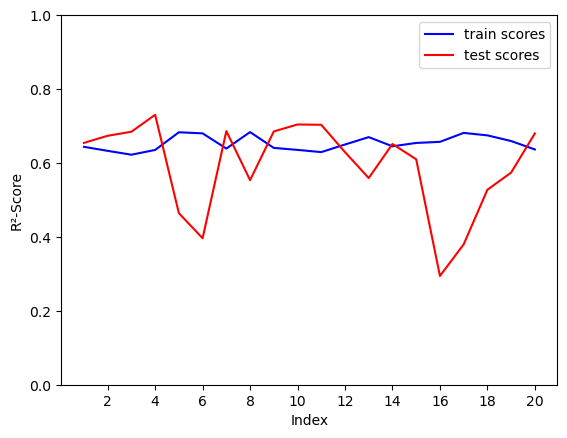

In [43]:
# Erzeuge die X-Achse als Indizes der Werte
x_achse = list(range(1, len(test_reg_scores) + 1)) 

# Liniendiagramm erstellen
plt.plot(x_achse, train_reg_scores, label='train scores', color='blue')  
plt.plot(x_achse, test_reg_scores, label='test scores', color='red')  

# Achsenbeschriftungen und Diagrammtitel hinzufügen
plt.xlabel('Index')
plt.ylabel('R²-Score')

# Limitiert y-Achse auf die Werte zwischen 0 und 1
plt.ylim(0, 1) 

# Nur ganze Zahlen auf der X-Achse anzeigen
plt.xticks(ticks=range(2, len(test_reg_scores) + 1, 2))

# Legende anzeigen
plt.legend()

# Diagramm anzeigen
plt.show()

Da die durchschnittlichen Trainingswerte bei einem soliden R²-Wert von ca 0.69 liegen und außerdem kaum streuen kann man sagen, 
dass das Modell gut generalisiert ist. 
Die Ähnlichkeit zwischen Trainings- und Testscore deutet darauf hin, 
dass das Modell die Daten gut beschreibt, ohne dass ein Overfitting stattfindet.
Die gelegentlichen Schwankungen im Testscore sind wenig relevant und sind vermutlich auf zufällige Variationen im Testdatensatz zurückzuführen.
Insgesamt kann man das Modell somit als robust und verlässlich einstufen.

Beim One-Hot-Encoding erhälte man so viele neue Spalten wie individuelle Kategorien pro Feature. (z.B. drei Features, mit jeweils fünf Kategorien =>
3 * 5 = 15 neue Spalten.)
Ein Problem beim One-Hot-Encoding in Bezug auf den Train-Test-Split besteht darin,
dass die Kategorien in den beiden Datensätzen unterschiedlich sein können, in unserem Fall gibt es beispielsweise sechs Kategorien für das Feature 'Owner'.
Es könnte nun sein, dass beim Splitten der Daten nicht alle Kategorien in beiden Splits vorhanden sind.
Um dieses Problem zu vermeiden, empfiehlt die offizielle sklearn-Dokumentation, die One-Hot-Codierung nur auf den Trainingsdatensatz anzuwenden und diese Codierung dann auch auf den Testdatensatz zu übertragen. Dadurch sind alle im Trainingssatz vorhandenen Daten auch im Testdatensatz vorhanden und umgekehrt sind keine unerwarteten neuen Datentypen im Testdatensatz vorhanden, die das Modell im Training garnicht gelernt hat.

In [46]:
train_o_reg_scores = []
test_o_reg_scores = []

In [47]:
for _ in range(20):
    # Trennen der Features und des Targets in einen Test- und Trainingsdatensatz:
    X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.2)

    # Alle Werte in den kategorischen Spalten in Strings umwandeln
    to_encode = ['Make', 'Fuel Type', 'Transmission', 'Color', 'Owner', 'Seller Type', 'Drivetrain', 'Seating Capacity']
    X_train_o[to_encode] = X_train_o[to_encode].astype(str)
    X_test_o[to_encode] = X_test_o[to_encode].astype(str)
    
    # Auffüllen der kategorischen Features mit NaN-Werten
    categorical_columns = ['Drivetrain', 'Seating Capacity'] 
    X_train_o[categorical_columns] = X_train_o[categorical_columns].fillna("Unknown")
    X_test_o[categorical_columns] = X_test_o[categorical_columns].fillna("Unknown")

    # Initialisieren des One-Hot-Encoder Objekts
    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    
    # Anwenden des Encoders auf die Datensätze. (Wichtig: 'fit' nur auf den Trainigsdatensatz anwenden.)
    X_train_o_encoded = encoder.fit_transform(X_train_o[to_encode])
    X_test_o_encoded = encoder.transform(X_test_o[to_encode])

    # Numerische Features beibehalten, alte kategorische Features löschen
    X_train_o_num = X_train_o.drop(columns=to_encode)
    X_test_o_num = X_test_o.drop(columns=to_encode)

    # Füllen der numerischen Features
    X_train_o_num = X_train_o_num.fillna(X_train_o_num.mean().round())
    X_test_o_num = X_test_o_num.fillna(X_test_o_num.mean().round())

    scaler = MinMaxScaler()
    
    X_train_o_scaled = scaler.fit_transform(X_train_o_num)
    X_test_o_scaled = scaler.transform(X_test_o_num)

    # Zusammenfügen der numerischen und one-hot-encodeten Features
    X_train_o_combined = np.hstack([X_train_o_scaled, X_train_o_encoded])
    X_test_o_combined = np.hstack([X_test_o_scaled, X_test_o_encoded])
    
    # Trainieren des Regressionsmodells
    reg = LinearRegression().fit(X_train_o_combined, y_train_o)
    
    # Validierung der Daten mittels R²-Score (jeweils Trainings- und Testdaten)
    train_o_score = reg.score(X_train_o_combined, y_train_o)
    test_o_score = reg.score(X_test_o_combined, y_test_o)

    # Speichern der Ergebnisse in der zuvor initialisierten Liste
    train_o_reg_scores.append(train_o_score)
    test_o_reg_scores.append(test_o_score)

# DIE NACHFOLGENDEN MELDUNGEN SIND KEINE FEHLERMELDUNGEN SONDERN NUR WARNUNGEN, DASS UNBEKANNTE DATEN IN TEST ALS 0 ENCODED WERDEN, DIES IST ABSICHT UND NICHT WEITER SCHLIMM

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Fou

In [48]:
# Anzeigen der Training Scores
train_o_reg_scores

[0.7688433602820185,
 0.8065502333636244,
 0.8088961542751727,
 0.7932533166465983,
 0.777010078654355,
 0.8143921505128089,
 0.7764531073544877,
 0.7847415458143592,
 0.7942277471968328,
 0.8083550004211425,
 0.8267565983143216,
 0.7939451638657011,
 0.7872557810081697,
 0.7772615199907872,
 0.7866387617718018,
 0.798929424650574,
 0.8172439498770981,
 0.7863565232586035,
 0.8328898824704856,
 0.7895808543022249]

In [49]:
# Anzeigen der Test Scores
test_o_reg_scores

[0.6059380799210721,
 0.5570776246812688,
 0.6751818120991735,
 0.5582430387545119,
 0.6722339304953029,
 0.5860292683004227,
 0.7002152280787781,
 0.681423936739258,
 0.7644854709576214,
 0.5852359598094354,
 0.6422231280018422,
 0.7269365669638672,
 0.5926904233217705,
 0.5364692483804476,
 0.6480037938273968,
 0.624405777372438,
 0.4896686105323972,
 0.8259689498965612,
 0.546323289945631,
 0.6020912725943149]

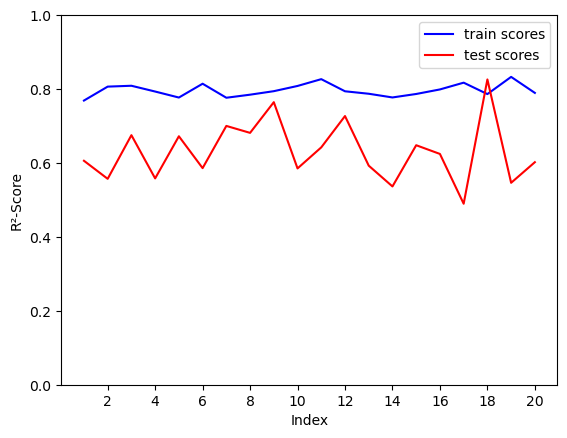

In [50]:
# Erzeuge die X-Achse als Indizes der Werte
x_achse = list(range(1, len(test_o_reg_scores) + 1)) 

# Liniendiagramm erstellen
plt.plot(x_achse, train_o_reg_scores, label='train scores', color='blue')  
plt.plot(x_achse, test_o_reg_scores, label='test scores', color='red')  

# Achsenbeschriftungen und Diagrammtitel hinzufügen
plt.xlabel('Index')
plt.ylabel('R²-Score')

# Limitiert y-Achse auf die Werte zwischen 0 und 1
plt.ylim(0, 1) 

# Nur ganze Zahlen auf der X-Achse anzeigen
plt.xticks(ticks=range(2, len(test_reg_scores) + 1, 2))

# Legende anzeigen
plt.legend()

# Diagramm anzeigen
plt.show()

Durch das One-Hot-Encoding sind die kategorischen Features nun mit in das Modell eingeflossen. Das Modell weist einen deutlich gestiegenen R²-Score auf,
auch die Test-Scores sind besser und etwas stabiler geworden. Das Ansteigen beider Werte ergibt Sinn, da nun insgesamt mehr Daten in das Modell eingespeist worden sind. 

In [52]:
train_reg_scores_lasso = []
test_reg_scores_lasso = []

In [53]:
for _ in range(20):
    # Trennen der Features und des Targets in einen Test- und Trainingsdatensatz:
    X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(features, target, test_size=0.2)

    # Alle Werte in den kategorischen Spalten in Strings umwandeln
    to_encode_lasso = ['Make', 'Fuel Type', 'Transmission', 'Color', 'Owner', 'Seller Type', 'Drivetrain', 'Seating Capacity']
    X_train_lasso[to_encode_lasso] = X_train_lasso[to_encode_lasso].astype(str)
    X_test_lasso[to_encode_lasso] = X_test_lasso[to_encode_lasso].astype(str)
    
    # Auffüllen der kategorischen Features mit NaN-Werten
    categorical_columns_lasso = ['Drivetrain', 'Seating Capacity'] 
    X_train_lasso[categorical_columns_lasso] = X_train_lasso[categorical_columns_lasso].fillna("Unknown")
    X_test_lasso[categorical_columns_lasso] = X_test_lasso[categorical_columns_lasso].fillna("Unknown")

    # Initialisieren des One-Hot-Encoder Objekts
    encoder_lasso = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    
    # Anwenden des Encoders auf die Datensätze. (Wichtig: 'fit' nur auf den Trainigsdatensatz anwenden.)
    X_train_lasso_encoded = encoder_lasso.fit_transform(X_train_lasso[to_encode_lasso])
    X_test_lasso_encoded = encoder_lasso.transform(X_test_lasso[to_encode_lasso])

    # Numerische Features beibehalten, alte kategorische Features löschen
    X_train_lasso_num = X_train_lasso.drop(columns=to_encode_lasso)
    X_test_lasso_num = X_test_lasso.drop(columns=to_encode_lasso)

    # Füllen der numerischen Features
    X_train_lasso_num = X_train_lasso_num.fillna(X_train_lasso_num.mean().round())
    X_test_lasso_num = X_test_lasso_num.fillna(X_test_lasso_num.mean().round())

    scaler_lasso = MinMaxScaler()
    
    X_train_lasso_scaled = scaler.fit_transform(X_train_lasso_num)
    X_test_lasso_scaled = scaler.transform(X_test_lasso_num)

    # Zusammenfügen der numerischen und one-hot-encodeten features
    X_train_lasso_combined = np.hstack([X_train_lasso_scaled, X_train_lasso_encoded])
    X_test_lasso_combined = np.hstack([X_test_lasso_scaled, X_test_lasso_encoded])

    # Trainieren des Lasso Regressionsmodells (anstatt LinearRegression)
    lasso_reg = Lasso(alpha=0.01).fit(X_train_lasso_combined, y_train_lasso)
    
    # Validierung der Daten mittels R²-Score (jeweils Trainings- und Testdaten)
    train_lasso_score = lasso_reg.score(X_train_lasso_combined, y_train_lasso)
    test_lasso_score = lasso_reg.score(X_test_lasso_combined, y_test_lasso)
    
    # Speichern der Ergebnisse in der zuvor initialisierten Liste
    train_reg_scores_lasso.append(train_lasso_score)
    test_reg_scores_lasso.append(test_lasso_score)

# DIE NACHFOLGENDEN MELDUNGEN SIND KEINE FEHLERMELDUNGEN SONDERN NUR WARNUNGEN, DASS UNBEKANNTE DATEN IN TEST ALS 0 ENCODED WERDEN, DIES IST ABSICHT UND NICHT WEITER SCHLIMM

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.706e+10, tolerance: 1.181e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the

In [54]:
# Anzeigen der Training Scores
train_reg_scores_lasso

[0.8164223662865424,
 0.8203120304144177,
 0.8066750642523252,
 0.8005652123930997,
 0.7961179608779738,
 0.8065132466101714,
 0.7853143251865182,
 0.7750176216863591,
 0.8097540544679724,
 0.8026708458142893,
 0.7873272961080353,
 0.8103340505221073,
 0.7839941553844241,
 0.804646035040117,
 0.7855786717196429,
 0.797917901454722,
 0.7959138026293948,
 0.7931269618816175,
 0.8053446029146262,
 0.7946988457844666]

In [55]:
# Anzeigen der Test Scores
test_reg_scores_lasso

[0.6284273978361217,
 0.6327986300078041,
 0.6620274047724855,
 0.6981049004831344,
 0.7690953450322304,
 0.7261277691698322,
 0.6315116572633718,
 0.6210699332134848,
 0.6426251375316447,
 0.6289848991815907,
 0.6750115807607484,
 0.6594218038821474,
 0.8223815551418437,
 0.7179462777519199,
 0.619806292346031,
 0.7161579719494475,
 0.736890913417513,
 0.7756888506320202,
 0.6917285113453174,
 0.6823919601668318]

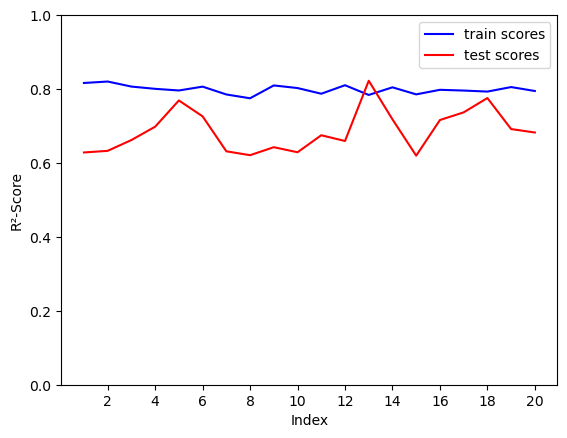

In [56]:
# Erzeuge die X-Achse als Indizes der Werte
x_achse = list(range(1, len(test_reg_scores_lasso) + 1)) 

# Liniendiagramm erstellen
plt.plot(x_achse, train_reg_scores_lasso, label='train scores', color='blue')  
plt.plot(x_achse, test_reg_scores_lasso, label='test scores', color='red')  

# Achsenbeschriftungen und Diagrammtitel hinzufügen
plt.xlabel('Index')
plt.ylabel('R²-Score')
# Limitiert y-Achse auf die Werte zwischen 0 und 1
plt.ylim(0, 1) 

# Nur ganze Zahlen auf der X-Achse anzeigen
plt.xticks(ticks=range(2, len(test_reg_scores) + 1, 2))

# Legende anzeigen
plt.legend()

# Diagramm anzeigen
plt.show()

Seating Capacity ist vom Typ 'object' bzw. 'string'. Es sind an sich Zahlenwerte, die aber keinen Bereich angeben (z.B. 4,2 oder 3.9 Sitze sind unsinnig)
und somit ein Klassifikationsproblem auf Basis der Sitzanzahl beschreiben.

In [58]:
# Aufteilen in Features und Target
target_q = df['Seating Capacity']
features_q = df.loc[:, df.columns != 'Seating Capacity']

In [59]:
# Fehlende Werte abfragen
target_q.isna().sum()

64

In [60]:
# Indizes der Zeilen mit fehlenden Werten ausfindig machen
missing_indices = target_q[target_q.isnull()].index

# Entfernen dieser Indizes aus Target und Features
features_q_cleaned = features_q.drop(index=missing_indices)
target_q_cleaned = target_q.drop(index=missing_indices)

In [61]:
# Längenabfrage des Targets
len(target_q_cleaned)

1966

In [62]:
# Längenabfrage der Features
len(features_q_cleaned)

1966

Features und target haben die gleiche Länge, das Entfernen war erfolgreich

# r)

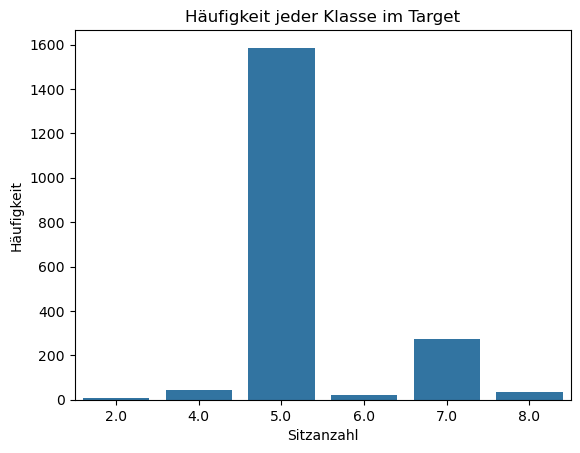

In [65]:
# Einfaches Balkendiagramm
sn.countplot(x=target_q_cleaned)  
plt.title('Häufigkeit jeder Klasse im Target')
plt.xlabel('Sitzanzahl')
plt.ylabel('Häufigkeit')
plt.show()

In [66]:
# Häufigste Klasse (5.0) zurückgeben, [0] damit ein einzelner Wert anstatt eine pandas series ausgegeben wird
most_common_class = target_q_cleaned.mode()[0]

# Zählen der Werte der Klasse
most_common_count = (target_q_cleaned == most_common_class).sum()

# Benchmark
benchmark = most_common_count / len(target_q_cleaned)
benchmark

0.8067141403865717

ein Klassifikator (Benchmark-Model) hätte eine Geanuigkeit von 80.7%.

Auch eine logistische Regression benötigt, analog zur linearen Regression numerische Werte zum rechnen.
Sie ist ebenfalls ein mathematisches Modell.

In [69]:
features_q_cleaned = features_q_cleaned.drop(labels=['Model', 'Location'], axis=1)

In [70]:
train_q_reg_scores = []
test_q_reg_scores = []

In [71]:
label_encoder = LabelEncoder()
target_q_encoded = label_encoder.fit_transform(target_q_cleaned)

for _ in range(20):
    # Trennen der Features und des Targets in einen Test- und Trainingsdatensatz:
    X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(features_q_cleaned, target_q_encoded, test_size=0.2)
    
    # Löschen kategorischer Features aus den X-Datensätzen:
    X_train_q = X_train_q.select_dtypes(exclude=['object'])
    X_test_q = X_test_q.select_dtypes(exclude=['object'])
    
    # Auffüllen der fehlenden Werte mit dem Mittelwert des Features mit anschließendem Runden:
    X_train_q = X_train_q.fillna(X_train_q.mean().round())
    X_test_q = X_test_q.fillna(X_test_q.mean().round())
    
    # Initialisierung Scaler-Objekt
    scaler = MinMaxScaler()
    
    X_train_q_scaled = scaler.fit_transform(X_train_q)
    X_test_q_scaled = scaler.transform(X_test_q)

    # Trainieren des Regressionsmodells
    log = LogisticRegression().fit(X_train_q_scaled, y_train_q)
    
    # Validierung der Daten mittels R²-Score (jeweils Trainings- und Testdaten)
    train_q_score = log.score(X_train_q_scaled, y_train_q)
    test_q_score = log.score(X_test_q_scaled, y_test_q)
    
    # Speichern der Ergebnisse in der zuvor initialisierten Liste
    train_q_reg_scores.append(train_q_score)
    test_q_reg_scores.append(test_q_score)

In [72]:
# Anzeigen der Training Scores
train_q_reg_scores

[0.8950381679389313,
 0.8994910941475827,
 0.8975826972010178,
 0.8937659033078881,
 0.8880407124681934,
 0.8924936386768448,
 0.8944020356234097,
 0.8931297709923665,
 0.8982188295165394,
 0.8931297709923665,
 0.8950381679389313,
 0.9045801526717557,
 0.898854961832061,
 0.8880407124681934,
 0.8899491094147582,
 0.8994910941475827,
 0.8854961832061069,
 0.8975826972010178,
 0.8867684478371501,
 0.8867684478371501]

In [73]:
# Anzeigen der Test Scores
test_q_reg_scores

[0.8857868020304569,
 0.8807106598984772,
 0.883248730964467,
 0.8807106598984772,
 0.8705583756345178,
 0.8934010152284264,
 0.8908629441624365,
 0.9060913705583756,
 0.8857868020304569,
 0.8984771573604061,
 0.8857868020304569,
 0.8451776649746193,
 0.8527918781725888,
 0.9187817258883249,
 0.8984771573604061,
 0.883248730964467,
 0.8781725888324873,
 0.8934010152284264,
 0.9137055837563451,
 0.9187817258883249]

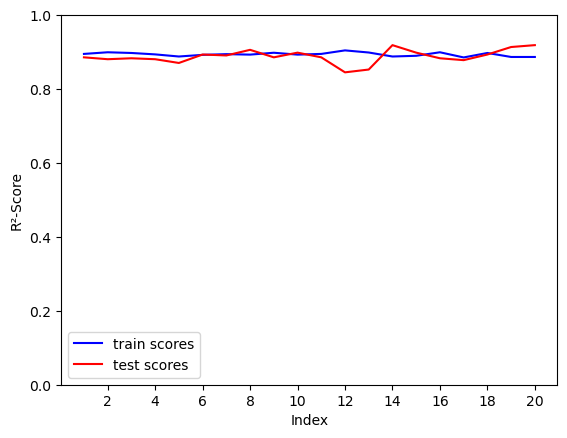

In [74]:
# Erzeuge die X-Achse als Indizes der Werte
x_achse = list(range(1, len(test_q_reg_scores) + 1)) 

# Liniendiagramm erstellen
plt.plot(x_achse, train_q_reg_scores, label='train scores', color='blue')  
plt.plot(x_achse, test_q_reg_scores, label='test scores', color='red')  

# Achsenbeschriftungen und Diagrammtitel hinzufügen
plt.xlabel('Index')
plt.ylabel('R²-Score')

# Limitiert y-Achse auf die Werte zwischen 0 und 1
plt.ylim(0, 1) 

# Nur ganze Zahlen auf der X-Achse anzeigen
plt.xticks(ticks=range(2, len(test_q_reg_scores) + 1, 2))

# Legende anzeigen
plt.legend()

# Diagramm anzeigen
plt.show()

Das logistische Regressionsmodell übertrifft mit einer Test-Accuracy zwischen 87 % und 91 % deutlich den Benchmark von 80,7 %,
was auf bessere Vorhersagefähigkeiten hinweist. Die Trainingsgenauigkeit bleibt stabil bei etwa 89-90 %,
während die Testgenauigkeit leicht schwankt, aber dennoch konsistente Ergebnisse liefert.

In [76]:
train_x_reg_scores = []
test_x_reg_scores = []

In [77]:
label_encoder_x = LabelEncoder()
target_x_encoded = label_encoder_x.fit_transform(target_q_cleaned)

for _ in range(20):
    # Trennen der Features und des Targets in einen Test- und Trainingsdatensatz:
    X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(features_q_cleaned, target_x_encoded, test_size=0.2)

    # Alle Werte in den kategorischen Spalten in Strings umwandeln
    to_encode_x = ['Make', 'Fuel Type', 'Transmission', 'Color', 'Owner', 'Seller Type', 'Drivetrain']
    X_train_x[to_encode_x] = X_train_x[to_encode_x].astype(str)
    X_test_x[to_encode_x] = X_test_x[to_encode_x].astype(str)
    
    # Auffüllen der kategorischen Features mit NaN-Werten
    X_train_x['Drivetrain'] = X_train_x['Drivetrain'].fillna("Unknown")
    X_test_x['Drivetrain'] = X_test_x['Drivetrain'].fillna("Unknown")

    # Initialisieren des One-Hot-Encoder Objekts
    encoder_x = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    
    # Anwenden des Encoders auf die Datensätze. (Wichtig: 'fit' nur auf den Trainigsdatensatz anwenden.)
    X_train_x_encoded = encoder_x.fit_transform(X_train_x[to_encode_x])
    X_test_x_encoded = encoder_x.transform(X_test_x[to_encode_x])

    # Numerische Features beibehalten, alte kategorische Features löschen
    X_train_x_num = X_train_x.drop(columns=to_encode_x)
    X_test_x_num = X_test_x.drop(columns=to_encode_x)

    # Füllen der numerischen Features
    X_train_x_num = X_train_x_num.fillna(X_train_x_num.mean().round())
    X_test_x_num = X_test_x_num.fillna(X_test_x_num.mean().round())

    scaler_x = MinMaxScaler()
    
    X_train_x_scaled = scaler_x.fit_transform(X_train_x_num)
    X_test_x_scaled = scaler_x.transform(X_test_x_num)

    # Zusammenfügen der numerischen und one-hot-encodeten Features
    X_train_x_combined = np.hstack([X_train_x_scaled, X_train_x_encoded])
    X_test_x_combined = np.hstack([X_test_x_scaled, X_test_x_encoded])
    
    # Trainieren des Regressionsmodells
    log_x = LogisticRegression().fit(X_train_x_scaled, y_train_x)
    
    # Validierung der Daten mittels R²-Score (jeweils Trainings- und Testdaten)
    train_x_score = log_x.score(X_train_x_scaled, y_train_x)
    test_x_score = log_x.score(X_test_x_scaled, y_test_x)
    
    # Speichern der Ergebnisse in der zuvor initialisierten Liste
    train_x_reg_scores.append(train_x_score)
    test_x_reg_scores.append(test_x_score)
    
# DIE NACHFOLGENDEN MELDUNGEN SIND KEINE FEHLERMELDUNGEN SONDERN NUR WARNUNGEN, DASS UNBEKANNTE DATEN IN TEST ALS 0 ENCODED WERDEN, DIES IST ABSICHT UND NICHT WEITER SCHLIMM

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [0, 1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Fou

In [78]:
# Anzeigen der Training Scores
train_x_reg_scores

[0.8963104325699746,
 0.8937659033078881,
 0.8899491094147582,
 0.8918575063613231,
 0.8950381679389313,
 0.8912213740458015,
 0.8874045801526718,
 0.8994910941475827,
 0.8905852417302799,
 0.8924936386768448,
 0.8975826972010178,
 0.8931297709923665,
 0.8867684478371501,
 0.8975826972010178,
 0.8950381679389313,
 0.8937659033078881,
 0.8950381679389313,
 0.8982188295165394,
 0.8918575063613231,
 0.8861323155216285]

In [79]:
# Anzeigen der Test Scores
test_x_reg_scores

[0.8654822335025381,
 0.8807106598984772,
 0.9137055837563451,
 0.8908629441624365,
 0.8857868020304569,
 0.8781725888324873,
 0.9035532994923858,
 0.8730964467005076,
 0.8857868020304569,
 0.9035532994923858,
 0.8807106598984772,
 0.8984771573604061,
 0.9238578680203046,
 0.8934010152284264,
 0.8908629441624365,
 0.8984771573604061,
 0.8553299492385786,
 0.883248730964467,
 0.8934010152284264,
 0.9187817258883249]

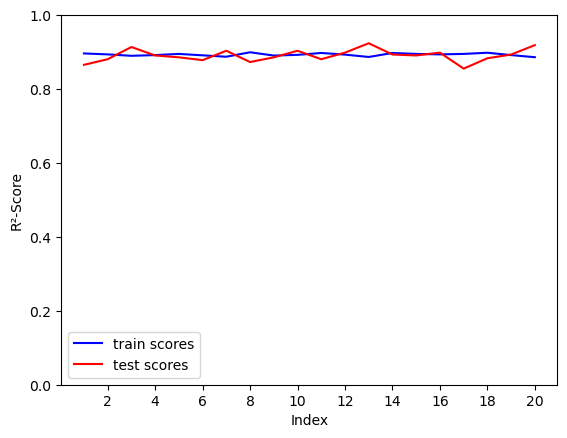

In [80]:
# Erzeuge die X-Achse als Indizes der Werte
x_achse = list(range(1, len(test_x_reg_scores) + 1)) 

# Liniendiagramm erstellen
plt.plot(x_achse, train_x_reg_scores, label='train scores', color='blue')  
plt.plot(x_achse, test_x_reg_scores, label='test scores', color='red')  

# Achsenbeschriftungen und Diagrammtitel hinzufügen
plt.xlabel('Index')
plt.ylabel('R²-Score')

# Limitiert y-Achse auf die Werte zwischen 0 und 1
plt.ylim(0, 1) 

# Nur ganze Zahlen auf der X-Achse anzeigen
plt.xticks(ticks=range(2, len(test_x_reg_scores) + 1, 2))

# Legende anzeigen
plt.legend()

# Diagramm anzeigen
plt.show()

Korrelation der numerischen Variablen mit dem Preis

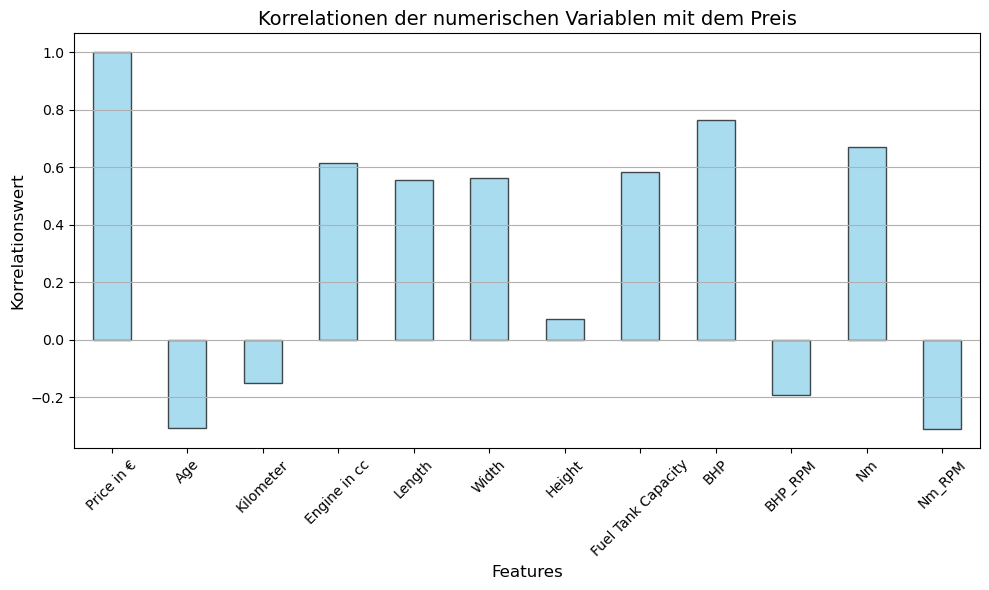

In [82]:
correlation = df.select_dtypes(include=['number']).apply(lambda x: x.corr(df["Price in €"]))

# Erstelle den Bar-Plot
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Korrelationen der numerischen Variablen mit dem Preis', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Korrelationswert', fontsize=12)

# Gitter hinzufügen
plt.grid(True, axis='y')

# Diagramm anzeigen
plt.xticks(rotation=45)  # Dreht die X-Achsen-Beschriftungen, falls nötig
plt.tight_layout()  # Sorgt dafür, dass das Layout passt
plt.show()

Das Diagramm zeigt wie stark die einzelnen Features mit dem Preis korrelieren. Als Kontrollwert dient der Preis selbst mit einer Korellation von 1.
Andere Korrelationen ergeben auch Sinn, z.B. je niedriger das Alter oder der Kilometerstand desto höher der Preis, oder je mehr BHP (British Horse Power) das Auto hat desto teurer ist es.